# **ENDG 511 - Lab 1: Introduction to Deep Neural Networks using TensorFlow**

This colab notebook provides code and a framework for ***Lab 1***. You can work out your solutions here. The example in this lab was inspired by https://www.tensorflow.org/tutorials/quickstart/beginner, with some modifications and additions.


## Goals

In this lab, you will be introduced to the baiscs of TensorFlow and Keras, and you will learn how to use them to create deep learning models. The goals of this lab are:

- Understand the basic workflow for creating models in TensorFlow.
- Understand how to train TensorFlow models.
- Evaluate models in terms of accuracy, size and inference time.
- Understand how different model parameters can impact accuracy, size and inference time

## Layout
This lab is split into **two** parts. 
- **Part 1**: Run through the full example to gain familiarity with TensorFlow. And complete the exercises.
- **Part 2**: Convlutional Neural Netowrks Using TensorFlow. And complete the exercises.

# **Part 1**: Neural Network Machine Learning Model Using TensorFlow

This part of the lab demonstrates building and training a Neural Network to classify MNIST images. This tutorial uses TensorFlow and it is meant to give you a better understanding of how to build, train and evaluate machine learning models using TensorFlow.

### Import TensorFlow and Other Required Modules

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import time
import tempfile

2024-01-23 18:43:52.599917: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-23 18:43:54.542731: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-23 18:43:54.542838: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-23 18:43:54.830170: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-23 18:43:55.453571: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-23 18:43:55.454905: I tensorflow/core/platform/cpu_feature_guard.cc:1

### Download and prepare the MNIST dataset

The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset. It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9


In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


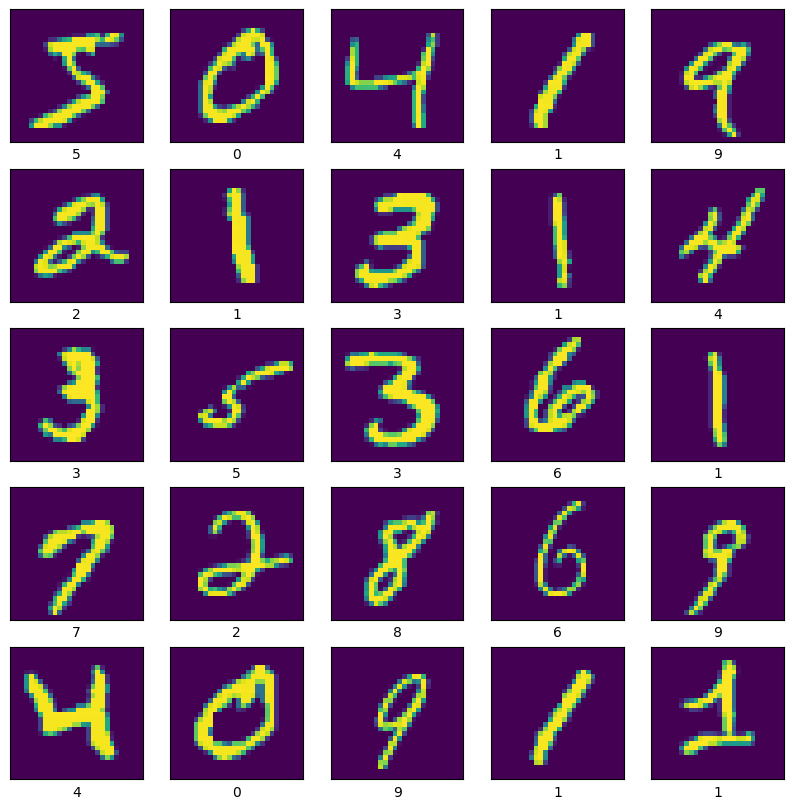

In [3]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Build Machine Learning Model

***Sequential*** is useful for stacking layers where each layer has one input tensor and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most TensorFlow models are composed of layers. This model uses the Flatten, Dense, and Dropout layers.

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

Let's display the architecture of our model:

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Save and Load Model
Let us save and load the model before training. This allows us to save the randomized weights and biases and make more accurate comparisons. We will use the saved model in the exercise section.

In [6]:
# Save your model
model.save('part1_model.h5')

# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('part1_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Compile and train the model

When compiling a model, an optimizer, a loss function and metrics need to be defined. 

- Optimizer: The Adam optimizer is the most popular optimizer and generally works well for classification and regression problems. It is based of gradient descent algorithms.
- Loss Function: The loss function is the function that computes the distance between the current output of the algorithm and the expected output. These functions need to be chosen depending on the application, the SparseCategoricalCrossentropy for example computes the crossentropy loss between the labels and predictions.
- Metrics: A metric is a function that is used to judge the performance of your model. This could be accuracy, mean squared error, cosine similarity or whatever metric works best for your use case.

In [7]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5


2024-01-23 18:44:06.679797: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1851/1875 [============================>.] - ETA: 0s - loss: 0.2997 - accuracy: 0.9135

2024-01-23 18:44:11.184969: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 [==============================] - 5s 2ms/step - loss: 0.2981 - accuracy: 0.9140 - val_loss: 0.1450 - val_accuracy: 0.9567
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1434 - accuracy: 0.9576 - val_loss: 0.1045 - val_accuracy: 0.9678
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1074 - accuracy: 0.9678 - val_loss: 0.0906 - val_accuracy: 0.9721
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0871 - accuracy: 0.9727 - val_loss: 0.0829 - val_accuracy: 0.9746
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0749 - accuracy: 0.9764 - val_loss: 0.0787 - val_accuracy: 0.9763


### Plot accuracy and loss graphs

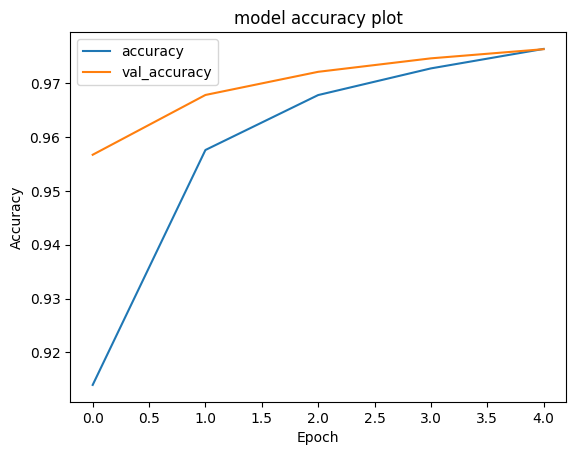

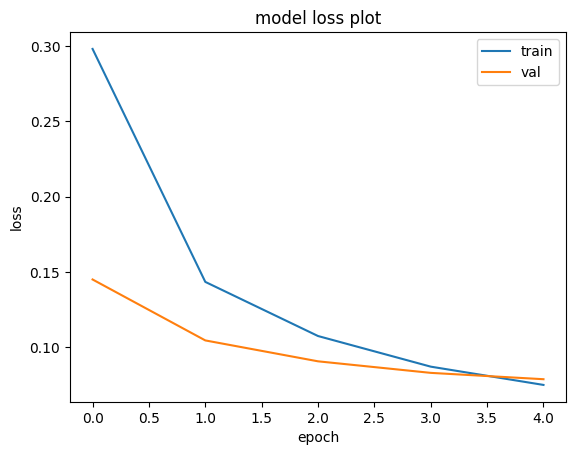

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

### Evaluate the model
There are many metrics that can be used to evaluate a model. We will focus on three metrics for this lab:
1. Model Loss and Accuracy
2. Model Size
3. Inference time

In [9]:
# Evaluate prediction accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


# Evaluate Model Size
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)


# Evaluate Inference Time
startTime = time.time()
prediction = model.predict(test_images)
executionTime = (time.time() - startTime)/len(test_images)

# Print
print('\nModel Accuracy:', test_acc*100, '%')
print("Model Size: %.2f bytes" % (get_gzipped_model_size('part1_model.h5')))
print("Inference Time is", executionTime, "s")

2024-01-23 18:44:28.449094: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 - 0s - loss: 0.0787 - accuracy: 0.9763 - 312ms/epoch - 996us/step
113/313 [=========>....................] - ETA: 0s

2024-01-23 18:44:28.812454: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 0s 929us/step

Model Accuracy: 97.63000011444092 %
Model Size: 374890.00 bytes
Inference Time is 7.221508026123047e-05 s


### Excercies (2.5 points)


**Question 1:** Load the untrained model. Change the learning rate to 1.5, recompile and retrain the model and display the accuracy and loss plots. What do you observe? **(0.5 point)**

In [10]:
# Load the untrained model
model_q1 = tf.keras.models.load_model("part1_model.h5")

In [11]:
#Recompile and retrain model with the learning rate as 1.5
optimizer = tf.keras.optimizers.Adam(learning_rate=1.5)
model_q1.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_q1.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5


2024-01-23 18:44:29.928399: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 5s 2ms/step - loss: 16.4968 - accuracy: 0.1014 - val_loss: 2.4717 - val_accuracy: 0.1010
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4584 - accuracy: 0.1008 - val_loss: 2.3776 - val_accuracy: 0.1010
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4521 - accuracy: 0.1034 - val_loss: 2.5648 - val_accuracy: 0.1135
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4544 - accuracy: 0.1031 - val_loss: 2.4715 - val_accuracy: 0.1135
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4661 - accuracy: 0.1010 - val_loss: 2.4741 - val_accuracy: 0.0982


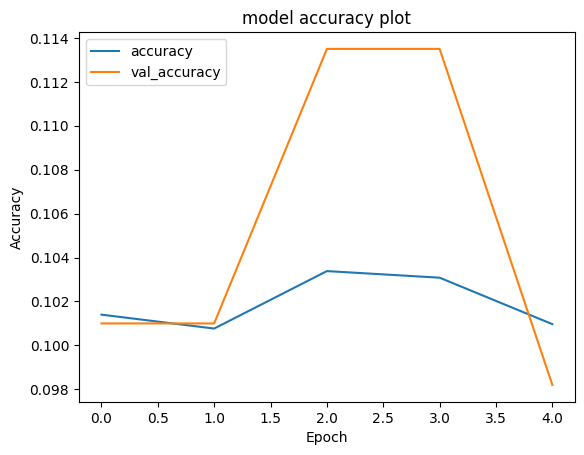

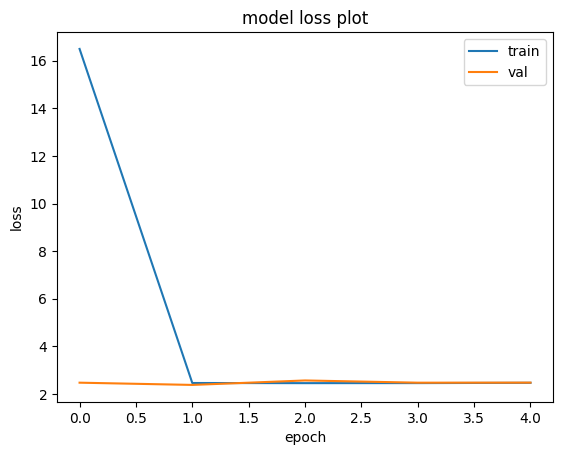

In [12]:
#Plot accuracy and loss plots
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

Conclusion: Based on the plots, it looks as if the model cannot reach a validation accuracy of higher than 0.103, which is very low compared to 0.97 from previously. 

**Question 2:** Load the untrained model. Change the learning rate to 0.0001, recompile and retrain the model and display the accuracy and loss plots. What do you observe? **(0.5 point)**

In [13]:
#Load the untrained model
model_q2 = tf.keras.models.load_model("part1_model.h5")

In [14]:
#Recompile and retrain model with the learning rate as 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_q2.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_q2.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6964 - accuracy: 0.8116 - val_loss: 0.3346 - val_accuracy: 0.9119
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3381 - accuracy: 0.9047 - val_loss: 0.2593 - val_accuracy: 0.9273
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2736 - accuracy: 0.9228 - val_loss: 0.2172 - val_accuracy: 0.9369
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2351 - accuracy: 0.9336 - val_loss: 0.1900 - val_accuracy: 0.9460
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2080 - accuracy: 0.9409 - val_loss: 0.1697 - val_accuracy: 0.9519


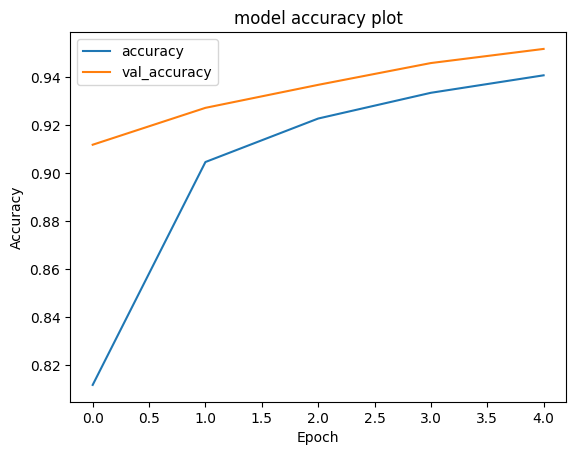

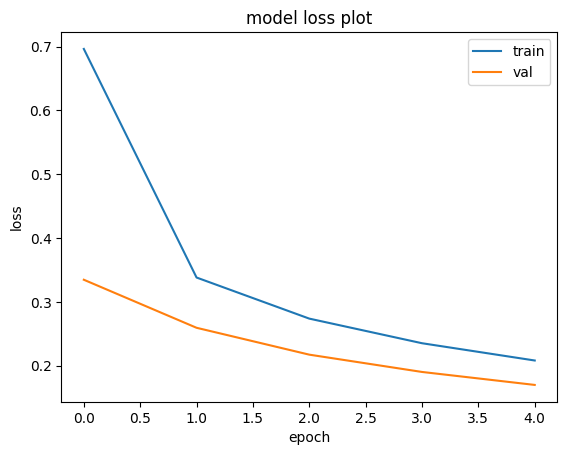

In [15]:
#Plot accuracy and loss plots
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

In [16]:
#Rebuild the model with 8 neurons in the first dense layer
model_q3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [17]:
#Recompile and retrain
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_q3.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_q3.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0394 - accuracy: 0.6257 - val_loss: 0.5186 - val_accuracy: 0.8666
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8105 - accuracy: 0.7090 - val_loss: 0.4331 - val_accuracy: 0.8864
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7663 - accuracy: 0.7296 - val_loss: 0.4135 - val_accuracy: 0.8876
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7423 - accuracy: 0.7398 - val_loss: 0.4011 - val_accuracy: 0.8917
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7321 - accuracy: 0.7450 - val_loss: 0.4015 - val_accuracy: 0.8936


When using a learning rate of 0.0001, I noticed that the accuracy was above 90 again and the loss dropped lower than 0.2 on validation. When comparing the results of question 1 and 2 to the original learning rate, it can be seen that the accuracy drops the bigger the number is, and also starts to drop off if the rate is too small. The peak accuracy of the model based off learning rate seems to be around 0.001.

**Question 3:** Rebuild the model with 8 neurons in the first Dense layer instead of 128. Then recompile and retrain the model and save it. Finally compare the new size, accuracy and inference time to the original model. **(0.75 point)**

In [18]:
#Save the model
model_q3.save("part1_model_q3.h5")

In [19]:
# Evaluate prediction accuracy
test_loss, test_acc = model_q3.evaluate(test_images,  test_labels, verbose=2)


# Evaluate Model Size
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)


# Evaluate Inference Time
startTime = time.time()
prediction = model.predict(test_images)
executionTime = (time.time() - startTime)/len(test_images)

# Print
print('\nModel Accuracy:', test_acc*100, '%')
print("Model Size: %.2f bytes" % (get_gzipped_model_size('part1_model_q3.h5')))
print("Inference Time is", executionTime, "s")

313/313 - 0s - loss: 0.4015 - accuracy: 0.8936 - 271ms/epoch - 867us/step
313/313 [==============================] - 0s 929us/step

Model Accuracy: 89.35999870300293 %
Model Size: 69340.00 bytes
Inference Time is 4.3553137779235837e-05 s


In comparison to the original model, the model with 8 neurons in the first dense layer is about 7% less accurate, however the model is much smaller than the original and has a smaller inference time, meaning it took less time to train the model on new data. In summary, having less nuerons means you are sacrificing aaccuracy for a quicker and smaller model. This can be helpful when you're using the model in smaller applications, such as putting the model onto a small device such as a raspberry pi. 

**Question 4:** Rebuild the model with 2048 neurons in the first Dense layer instead of 128. Then recompile and retrain the model and save it. Finally compare the new size, accuracy and inference time to the original model. **(0.75 point)**

In [20]:
#Rebuild the model with 2048 neurons in the first dense layer
model_q4 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(2048, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [21]:
#Recompile and retrain
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_q4.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_q4.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1888 - accuracy: 0.9427 - val_loss: 0.1028 - val_accuracy: 0.9648
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0868 - accuracy: 0.9730 - val_loss: 0.1051 - val_accuracy: 0.9662
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0636 - accuracy: 0.9804 - val_loss: 0.0765 - val_accuracy: 0.9774
Epoch 4/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0483 - accuracy: 0.9848 - val_loss: 0.0895 - val_accuracy: 0.9737
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0437 - accuracy: 0.9858 - val_loss: 0.0791 - val_accuracy: 0.9783


In [22]:
#Save the model
model_q4.save("part1_model_q4.h5")

In [23]:
# Evaluate prediction accuracy
test_loss, test_acc = model_q4.evaluate(test_images,  test_labels, verbose=2)


# Evaluate Model Size
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)


# Evaluate Inference Time
startTime = time.time()
prediction = model.predict(test_images)
executionTime = (time.time() - startTime)/len(test_images)

# Print
print('\nModel Accuracy:', test_acc*100, '%')
print("Model Size: %.2f bytes" % (get_gzipped_model_size('part1_model_q4.h5')))
print("Inference Time is", executionTime, "s")

313/313 - 1s - loss: 0.0791 - accuracy: 0.9783 - 783ms/epoch - 3ms/step
313/313 [==============================] - 0s 1ms/step

Model Accuracy: 97.82999753952026 %
Model Size: 16932516.00 bytes
Inference Time is 6.997430324554443e-05 s


With 2048 neurons, we see similar accuracy with the original model, only slightly higher. This model also shows similar inference time as the model with 8 neurons. In my opinion, using 128 neurons is much more practical because this model is much larger with only a slight increase in accuracy. Increasing the size of the model won't further improve the accuracy any more than is needed.

# **Part 2**: Convlutional Neural Netowrks Using TensorFlow

### Introduction:

Convolutional Neural Networks (CNN) are distinguished by their ability to identify patterns and features in images (e.g. edges, lines, circles or even objects). CNN's are widely adopted in computer vision applications and found success in audio signals and text. 


A typical Convolutional neural network is composed mainly of three types of layers:

* **Convolutional layer:** The core building block of a CNN, which consists of Filters or kernels to detect features. Generally, the first convolutional layers detect simple features (e.g. edges) and later layers identify objects. 
* **Pooling layer:** Reduces the spatial size of the feature maps so having fewer learnable weights and less computation cost.
* **Fully-connected layer:**  Known as the output layer, where the last identified feature maps are flattened and connected to dense layers for the classification task.



### Import TensorFlow and Other Required Modules

In [24]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import time
import tempfile

### Download and prepare the MNIST dataset
Similar to Part 1, loading the MNIST dataset and performing normalization to improve the training performance and speed.

In [25]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Build Machine Learning Model
In this part, we will build the LeNet-5 CNN model, one of the earliest CNN architectures proposed by Yann LeCun and others for recognizing handwritten and machine-printed characters.

The LeNet-5 architecture cosisits of 2 convolutional layers, 2 pooling layers and fully connected layers as shown in the figure below.

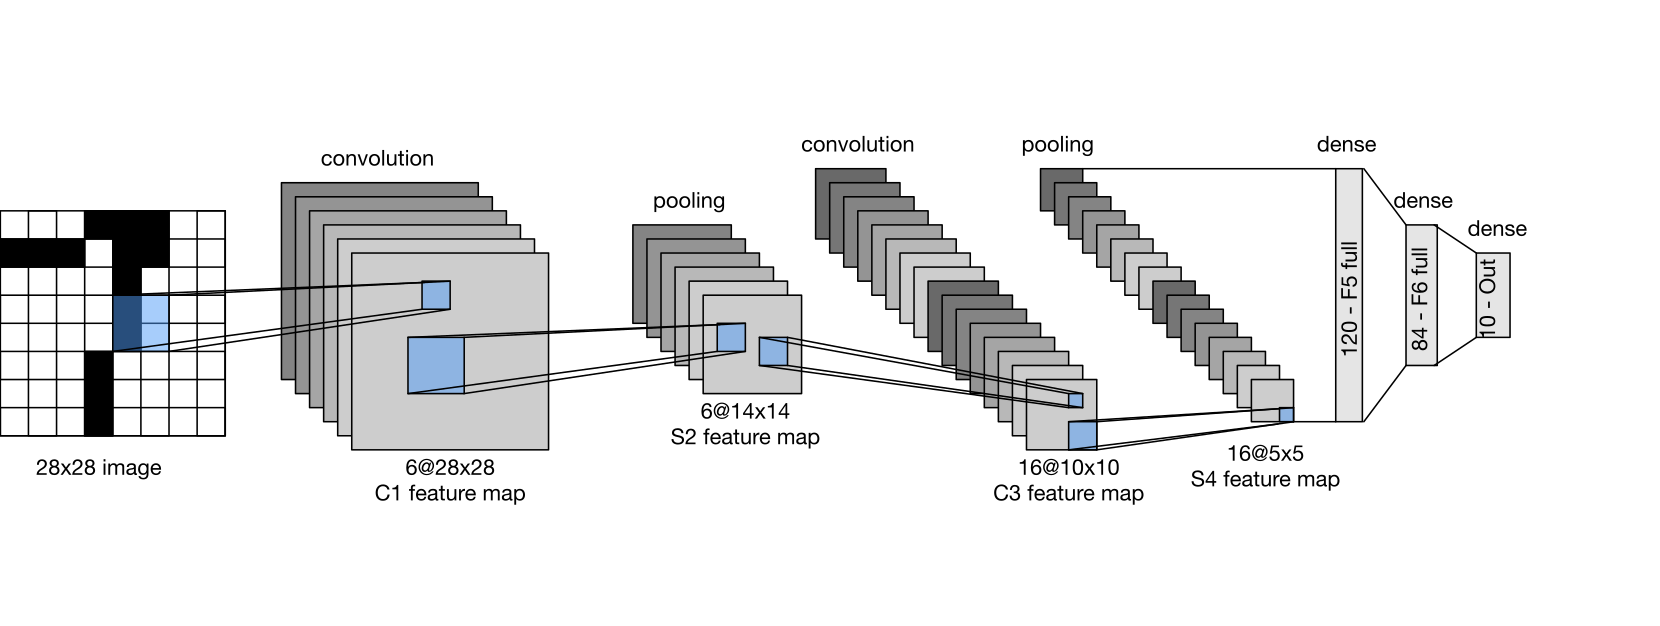

[Image Source](https://d2l.ai/chapter_convolutional-neural-networks/lenet.html#img-lenet)

In [26]:
lenet_5_model = models.Sequential()
# Convolutional layer1: cosits of 6 filters, filter size 5x5 and stride of 1
lenet_5_model.add( layers.Conv2D(filters = 6, kernel_size = (5,5),strides=1, padding = 'same', activation = 'relu', input_shape = (28,28,1)))
#Pooling layer 1
lenet_5_model.add(layers.AveragePooling2D(pool_size = (2,2)))
# Convolutional layer2: cosits of 16 filters, filter size 5x5 and stride of 1
lenet_5_model.add(layers.Conv2D(filters = 16, kernel_size = 5,strides=1, activation = 'relu'))
#Pooling layer 2 
lenet_5_model.add(layers.AveragePooling2D(pool_size = (2,2)))

#Output layer( Fully connected layers)
lenet_5_model.add(layers.Flatten())
lenet_5_model.add(layers.Dense(120, activation='relu'))
lenet_5_model.add(layers.Dense(84, activation='relu'))
lenet_5_model.add(layers.Dense(10, activation='softmax'))

# Save your model
lenet_5_model.save('part2_model.h5')


lenet_5_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_3 (Flatten)         (None, 400)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

### Compile and train the model


In [27]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
lenet_5_model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = lenet_5_model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 24s 12ms/step - loss: 0.1990 - accuracy: 0.9392 - val_loss: 0.0540 - val_accuracy: 0.9826
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0640 - accuracy: 0.9805 - val_loss: 0.0571 - val_accuracy: 0.9820
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0462 - accuracy: 0.9856 - val_loss: 0.0364 - val_accuracy: 0.9887
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0352 - accuracy: 0.9893 - val_loss: 0.0349 - val_accuracy: 0.9884
Epoch 5/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0295 - accuracy: 0.9906 - val_loss: 0.0246 - val_accuracy: 0.9918


### Plot accuracy and loss graphs

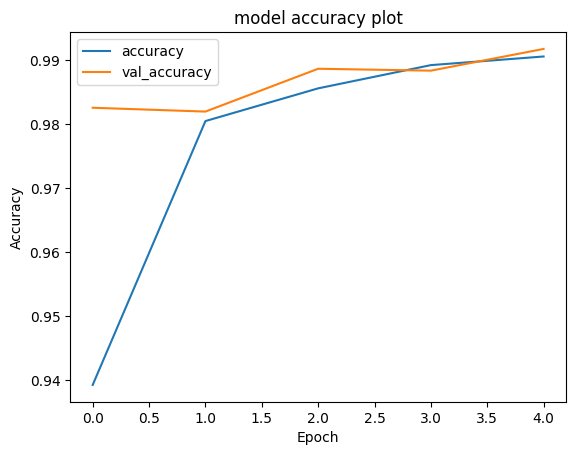

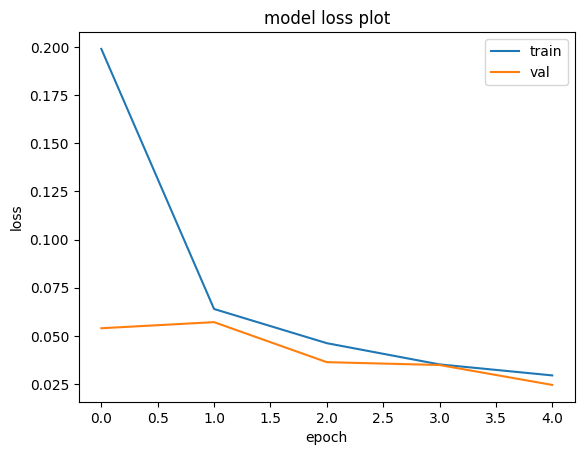

In [28]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

### Evaluate the model
Applying the same evaluation metrics in part 1 to evaluate the trained CNN model:

1. Model Loss and Accuracy
2. Model Size
3. Inference time

In [29]:
# Evaluate prediction accuracy
test_loss, test_acc = lenet_5_model.evaluate(test_images,  test_labels, verbose=2)


# Evaluate Model Size
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)


# Evaluate Inference Time
startTime = time.time()
prediction = lenet_5_model.predict(test_images)
executionTime = (time.time() - startTime)/len(test_images)

# Print
print('\nModel Accuracy:', test_acc*100, '%')
print("Model Size: %.2f bytes" % (get_gzipped_model_size('part2_model.h5')))
print("Inference Time is", executionTime, "s")

313/313 - 2s - loss: 0.0246 - accuracy: 0.9918 - 2s/epoch - 6ms/step
313/313 [==============================] - 2s 5ms/step

Model Accuracy: 99.18000102043152 %
Model Size: 228394.00 bytes
Inference Time is 0.0002629228115081787 s


## Excercises: (2.5 points)
**Q1:** Briefly compare the Fully connected (FC) model in part 1 and the CNN model in part 2 in terms of the model size, accuracy and inference time.**(0.5 point)**


---




 



When comparing the two models, what we can immediately see is that the CNN model is almost 100% , in comparison to the 97.6% of the FC model. Both are quite accurate, however the CNN model is more. The CNN model is also around 150 kB smaller than the FC model, and the inference time of the CNN model is only slightly higher than the FC model. From this comparison, we can see that the CNN model is more preferable because it's both smaller and more accurate. The CNN model has a total number of 61706 parameters, whereas the FC model has a total of 101770 parameters. Since the more parameters a model has, the more computationally demanding it is, we can assume that the CNN model is also less computationally demanding.

**Q2:** Modify the two convolutional layers of the LeNet-5 stride value into 2 and discuss the effect on the model size and accuracy. If the perfromance is affected, explain the reason? **(0.5 point)**

In [39]:
#Build the model
lenet_5_model_q2 = models.Sequential()
#Convolutional layer1: consists of 6 filters, filter size 5x5 and stride of 2
lenet_5_model_q2.add( layers.Conv2D(filters = 6, kernel_size = (5,5),strides=2, padding = 'same', activation = 'relu', input_shape = (28,28,1)))
#Pooling layer 1
lenet_5_model_q2.add(layers.AveragePooling2D(pool_size = (2,2)))
#Convolutional layer2: consists of 16 filters, filter size 5x5 and stride of 2
lenet_5_model_q2.add(layers.Conv2D(filters = 16, kernel_size = 5,strides=2, activation = 'relu'))
#Pooling layer 2 
lenet_5_model_q2.add(layers.AveragePooling2D(pool_size = (2,2)))

#Output layer( Fully connected layers)
lenet_5_model_q2.add(layers.Flatten())
lenet_5_model_q2.add(layers.Dense(120, activation='relu'))
lenet_5_model_q2.add(layers.Dense(84, activation='relu'))
lenet_5_model_q2.add(layers.Dense(10, activation='softmax'))

# Save your model
lenet_5_model_q2.save('part2_model_q2.h5')


lenet_5_model_q2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 14, 14, 6)         156       
                                                                 
 average_pooling2d_12 (Aver  (None, 7, 7, 6)           0         
 agePooling2D)                                                   
                                                                 
 conv2d_13 (Conv2D)          (None, 2, 2, 16)          2416      
                                                                 
 average_pooling2d_13 (Aver  (None, 1, 1, 16)          0         
 agePooling2D)                                                   
                                                                 
 flatten_8 (Flatten)         (None, 16)                0         
                                                                 
 dense_21 (Dense)            (None, 120)              

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
#Training the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
lenet_5_model_q2.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = lenet_5_model_q2.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 8s 4ms/step - loss: 0.5554 - accuracy: 0.8230 - val_loss: 0.3073 - val_accuracy: 0.9067
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2381 - accuracy: 0.9283 - val_loss: 0.1730 - val_accuracy: 0.9462
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1746 - accuracy: 0.9471 - val_loss: 0.1638 - val_accuracy: 0.9485
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1429 - accuracy: 0.9556 - val_loss: 0.1423 - val_accuracy: 0.9541
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1246 - accuracy: 0.9616 - val_loss: 0.1087 - val_accuracy: 0.9634


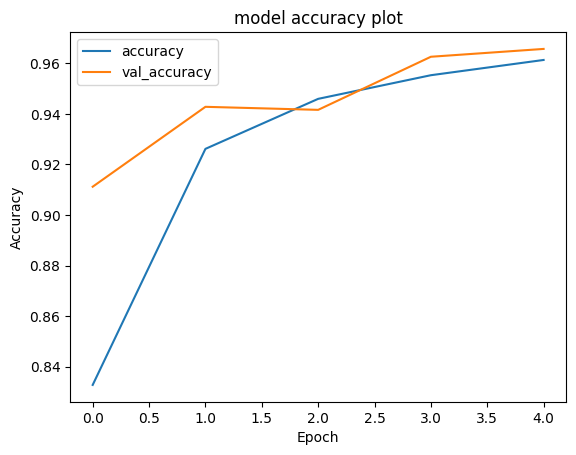

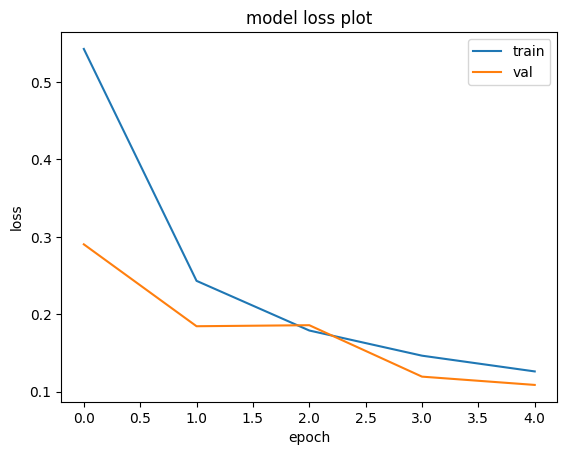

In [38]:
#Plot accuracy and loss
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

In [41]:
# Evaluate prediction accuracy
test_loss, test_acc = lenet_5_model_q2.evaluate(test_images,  test_labels, verbose=2)


# Evaluate Model Size
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)


# Evaluate Inference Time
startTime = time.time()
prediction = lenet_5_model_q2.predict(test_images)
executionTime = (time.time() - startTime)/len(test_images)

# Print
print('\nModel Accuracy:', test_acc*100, '%')
print("Model Size: %.2f bytes" % (get_gzipped_model_size('part2_model_q2.h5')))
print("Inference Time is", executionTime, "s")

313/313 - 1s - loss: 0.1087 - accuracy: 0.9634 - 711ms/epoch - 2ms/step
313/313 [==============================] - 1s 2ms/step

Model Accuracy: 96.34000062942505 %
Model Size: 60016.00 bytes
Inference Time is 0.00014165830612182618 s


When comparing the model using a stride value of 2 to the model using a value of 1, we can see that the model becomes less accurate, and this is likely due to the fact that when the stride increases, you start to lose more details and information contained in each convolutional layer, and therefore is less accurate when given a new dataset. We can also see that when the stride increases, the parameters decrease and therefore the size of the model becomes smaller.

**Q3:** Replace the average-pooling layer with a max-pooling layer for the LeNet-5 CNN model and discuss the effect on the trained model size and accuracy.**(0.5 point)**


In [42]:
#Build the model
lenet_5_model_q3 = models.Sequential()
#Convolutional layer1: consists of 6 filters, filter size 5x5 and stride of 1
lenet_5_model_q3.add(layers.Conv2D(filters = 6, kernel_size = (5,5),strides=1, padding = 'same', activation = 'relu', input_shape = (28,28,1)))
#Pooling layer 1
lenet_5_model_q3.add(layers.MaxPooling2D(pool_size = (2,2)))
#Convolutional layer2: consists of 16 filters, filter size 5x5 and stride of 1
lenet_5_model_q3.add(layers.Conv2D(filters = 16, kernel_size = 5,strides=1, activation = 'relu'))
#Pooling layer 2 
lenet_5_model_q3.add(layers.MaxPooling2D(pool_size = (2,2)))

#Output layer( Fully connected layers)
lenet_5_model_q3.add(layers.Flatten())
lenet_5_model_q3.add(layers.Dense(120, activation='relu'))
lenet_5_model_q3.add(layers.Dense(84, activation='relu'))
lenet_5_model_q3.add(layers.Dense(10, activation='softmax'))

# Save your model
lenet_5_model_q3.save('part2_model_q3.h5')


lenet_5_model_q3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_15 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 400)               0         
                                                                 
 dense_24 (Dense)            (None, 120)             

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
#Compile and Train the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
lenet_5_model_q3.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = lenet_5_model_q3.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 24s 12ms/step - loss: 0.1692 - accuracy: 0.9468 - val_loss: 0.0526 - val_accuracy: 0.9826
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0601 - accuracy: 0.9816 - val_loss: 0.0460 - val_accuracy: 0.9858
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0438 - accuracy: 0.9864 - val_loss: 0.0405 - val_accuracy: 0.9877
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0339 - accuracy: 0.9893 - val_loss: 0.0409 - val_accuracy: 0.9871
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0280 - accuracy: 0.9910 - val_loss: 0.0396 - val_accuracy: 0.9863


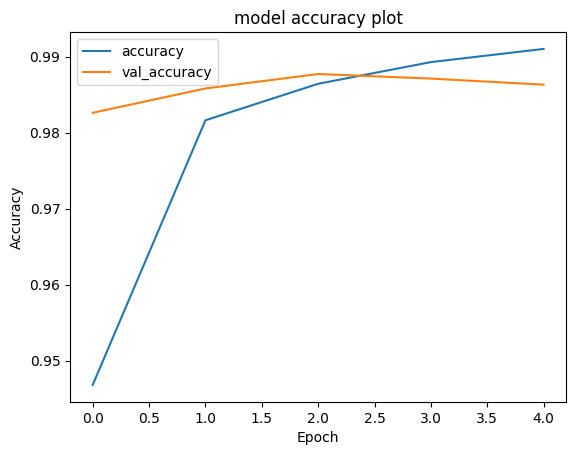

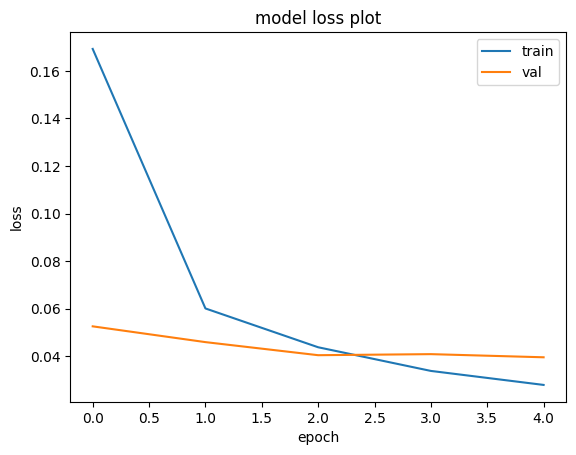

In [44]:
#Plot accuracy and loss
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

In [45]:
# Evaluate prediction accuracy
test_loss, test_acc = lenet_5_model_q3.evaluate(test_images,  test_labels, verbose=2)


# Evaluate Model Size
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)


# Evaluate Inference Time
startTime = time.time()
prediction = lenet_5_model_q3.predict(test_images)
executionTime = (time.time() - startTime)/len(test_images)

# Print
print('\nModel Accuracy:', test_acc*100, '%')
print("Model Size: %.2f bytes" % (get_gzipped_model_size('part2_model_q3.h5')))
print("Inference Time is", executionTime, "s")

313/313 - 2s - loss: 0.0396 - accuracy: 0.9863 - 2s/epoch - 5ms/step
313/313 [==============================] - 2s 5ms/step

Model Accuracy: 98.6299991607666 %
Model Size: 228368.00 bytes
Inference Time is 0.0001805516004562378 s


When looking at the plots of this model, we can see that the model tends to do really good in the training, reaching an accuracy of about 99%, but when it comes to the validation accuracy, it reaches a max of 98.77, then finally dips to 98.63%. This accuracy is still quite good, however I believe that the reason for the dip is because since we are using the max values for each input of the pooling layers, the model might have a tendency to overfit to these values in comparison to using average pooling, therefore resulting in a loss of performance in the validation accuracy. The size of the model seems to remain unchanged compared to the original CNN model used, which makes sense since we are essentially leaving the number of parameters unchanged, and only changing the value taken in the pooling layers.

**Q4:** IoT devices are limited in storage and computation resources. Therefore lightweight machine-learning or compressed models are ideal for IoT edge devices. 

In this exercise, you will modify the LeNet-5 CNN model on the MNIST dataset to reduce its size as much as possible (expecting less than 13k parameters) while maintaining inference accuracy equal to or above 95%. There is no limitation to the applied modifications. You may modify the number of filters, filter size, stride value, fully connected layers etc.**(1 point)**


For my model, in order to reduce the number of parameters but maintain a high accuracy, what I did was keep the same layers as the CNN model, but change the various parameters within each model. For the convolutional layer 1, I reduced the filter size to 3x3 and increased the stride to 2. I kept the 1st pooling layer the same. For convolutional layer 2, I reduced the number of filters to 8, reduced the filter size to 4x4 and increased the stride to 2. I also kept the 2nd pooling layer the same. I kept all my fully connected layers the same. In total, I was able to reduce the total number of parameters to 12930 (under 13k).

In [74]:
lenet_5_model_q4 = models.Sequential()
# Convolutional layer1: consists of 6 filters, filter size 3x3 and stride of 2
lenet_5_model_q4.add( layers.Conv2D(filters = 6, kernel_size = (3,3),strides=2, padding = 'same', activation = 'relu', input_shape = (28,28,1)))
#Pooling layer 1
lenet_5_model_q4.add(layers.AveragePooling2D(pool_size = (2,2)))
# Convolutional layer2: cosits of 16 filters, filter size 5x5 and stride of 2
lenet_5_model_q4.add(layers.Conv2D(filters = 8, kernel_size = 4,strides=2, activation = 'relu'))
#Pooling layer 2 
lenet_5_model_q4.add(layers.AveragePooling2D(pool_size = (2,2)))

#Output layer( Fully connected layers)
lenet_5_model_q4.add(layers.Flatten())
lenet_5_model_q4.add(layers.Dense(120, activation='relu'))
lenet_5_model_q4.add(layers.Dense(84, activation='relu'))
lenet_5_model_q4.add(layers.Dense(10, activation='softmax'))

# Save your model
lenet_5_model_q4.save('part2_model_q4.h5')


lenet_5_model_q4.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_70 (Conv2D)          (None, 14, 14, 6)         60        
                                                                 
 average_pooling2d_49 (Aver  (None, 7, 7, 6)           0         
 agePooling2D)                                                   
                                                                 
 conv2d_71 (Conv2D)          (None, 2, 2, 8)           776       
                                                                 
 average_pooling2d_50 (Aver  (None, 1, 1, 8)           0         
 agePooling2D)                                                   
                                                                 
 flatten_29 (Flatten)        (None, 8)                 0         
                                                                 
 dense_84 (Dense)            (None, 120)             

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [76]:
#Compile and Train the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
lenet_5_model_q4.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = lenet_5_model_q4.fit(train_images, train_labels, epochs=6, 
                    validation_data=(test_images, test_labels))

Epoch 1/6
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1889 - accuracy: 0.9410 - val_loss: 0.1938 - val_accuracy: 0.9348
Epoch 2/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1752 - accuracy: 0.9445 - val_loss: 0.1553 - val_accuracy: 0.9505
Epoch 3/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1662 - accuracy: 0.9474 - val_loss: 0.1597 - val_accuracy: 0.9460
Epoch 4/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1553 - accuracy: 0.9511 - val_loss: 0.1331 - val_accuracy: 0.9571
Epoch 5/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1483 - accuracy: 0.9522 - val_loss: 0.1348 - val_accuracy: 0.9564
Epoch 6/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1406 - accuracy: 0.9555 - val_loss: 0.1426 - val_accuracy: 0.9538


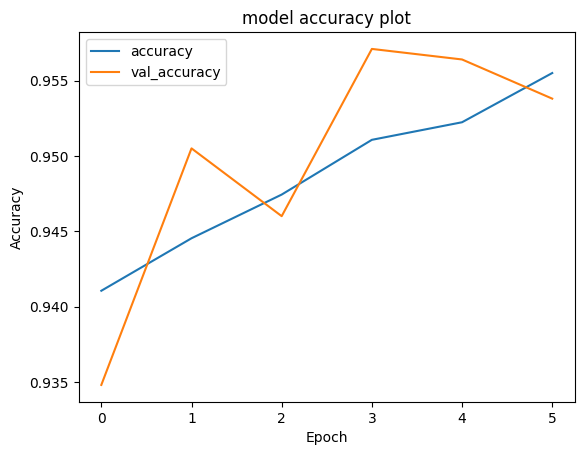

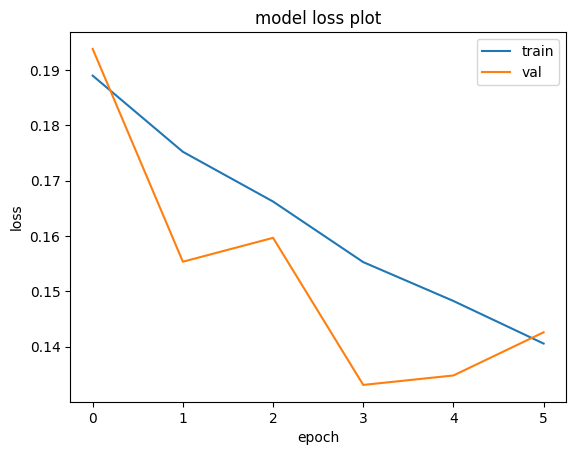

In [77]:
#Plot accuracy and loss
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

In the second epoch, there was a spike in loss, however afterwards the model was able to decrease the loss and resulted in an inference accuracy of above 95%.

In [78]:
# Evaluate prediction accuracy
test_loss, test_acc = lenet_5_model_q4.evaluate(test_images,  test_labels, verbose=2)


# Evaluate Model Size
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)


# Evaluate Inference Time
startTime = time.time()
prediction = lenet_5_model_q4.predict(test_images)
executionTime = (time.time() - startTime)/len(test_images)

# Print
print('\nModel Accuracy:', test_acc*100, '%')
print("Model Size: %.2f bytes" % (get_gzipped_model_size('part2_model_q4.h5')))
print("Inference Time is", executionTime, "s")

313/313 - 0s - loss: 0.1426 - accuracy: 0.9538 - 497ms/epoch - 2ms/step
313/313 [==============================] - 1s 1ms/step

Model Accuracy: 95.38000226020813 %
Model Size: 50089.00 bytes
Inference Time is 6.343059539794921e-05 s


As shown in the evaluation of the model, the accuracy was able to get above 95% while keeping the number of parameters to below 13k. While this may not be the best and most optimized model, the purpose of the model was to have a good accuracy while keeping the model small for use in IoT applications and therefore the models serves it's purpose. Overall, this was an interesting lab to learn the impact of different parameters on the accuracy and size of them model and understanding the reasoning for why we would not always simply want the most accurate model, even if it is the largest.